In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('data.csv')

In [13]:
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [14]:
df.shape

(569, 33)

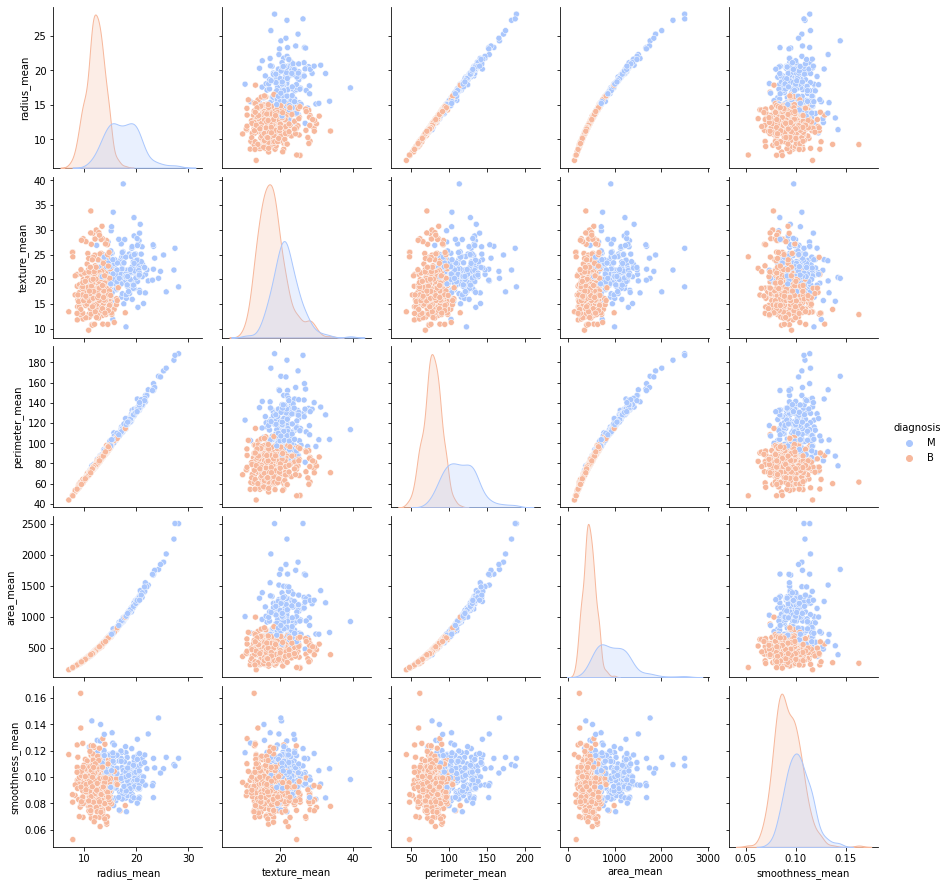

In [15]:
sns.pairplot(df,hue='diagnosis',palette='coolwarm',vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'])

In [16]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [17]:
df=df.dropna(axis=1)

In [18]:
df.shape

(569, 32)

In [19]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
sns.countplot(df['diagnosis'], label = 'count')

ValueError: could not convert string to float: 'M'

In [22]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [23]:
df=df.rename(columns={'diagnosis':'label'})

In [24]:
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [25]:
y=df['label'].values

In [26]:
print(np.unique(y))

['B' 'M']


In [27]:
#convert them to 1 or 0

In [28]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
Y=lab.fit_transform(y)

In [29]:
print(np.unique(Y))

[0 1]


In [30]:
X=df.drop(labels=['label','id'],axis=1)

In [31]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [32]:
#normailze --- convert them to values between 0 to 1

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()

In [35]:
scaler.fit(X)

MinMaxScaler()

In [36]:
X=scaler.transform(X)

In [37]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [38]:
#split the dat

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [40]:
x_train.shape

(426, 30)

In [41]:
x_test.shape

(143, 30)

In [43]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [44]:
model=Sequential()

In [45]:
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [46]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-traina

In [47]:
history = model.fit(x_train,y_train,verbose = 1,epochs = 100, batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/100
7/7 [==============================] - 4s 28ms/step - loss: 0.6870 - accuracy: 0.5094 - val_loss: 0.6510 - val_accuracy: 0.8881
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6613 - accuracy: 0.6080 - val_loss: 0.6138 - val_accuracy: 0.9021
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6972 - val_loss: 0.5727 - val_accuracy: 0.9161
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.8028 - val_loss: 0.5271 - val_accuracy: 0.9301
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5589 - accuracy: 0.8263 - val_loss: 0.4776 - val_accuracy: 0.9301
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5172 - accuracy: 0.8545 - val_loss: 0.4295 - val_accuracy: 0.9371
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4831 - accuracy: 0.8451 - val_loss: 0.3821 - val_accuracy: 0.9441
Epoch 8/100
7/7 [=========

5/5 [==============================] - 0s 1ms/step


<AxesSubplot: >

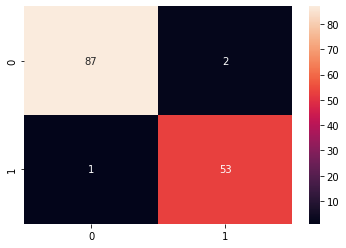

In [48]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)